This notebook looks into the use case when researcher would have a list of target names and is interested to see if any of these targets have any evidence in Open Targets that would be linking it to a specific disease. 

We have a library called utilityOT that has some commonly used functions that will be published in  a separate notebook. utilityOT should  be either in the same folder as your notebook or on the python path.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
from io import StringIO
import utilityOT
%matplotlib inline

sns.set_context("talk")
sns.set_style("whitegrid")


First lets get all the known gene names. We will be saving all the output into an 'examples' folder. It should be an existing folder for the results to be saved in there. If no parameter is passed to this function, everything will be saved to your notebook folder.
This step takes a while so if you have done it once, it is recommended to skip.
This step downloads all the information on existing targets and then saves all the target names into file named hgnc_symbol_set.txt

In [2]:
utilityOT.get_all_gene_symbols('examples/')

What we are doing below - is trying to simulate a real life example when we had a file with a list of target names. So we are going to read 100 random gene names from the file.

In [2]:
random_gene_names_list = utilityOT.get_random_gene_names('examples/hgnc_symbol_set.txt', 100)

In [3]:
print random_gene_names_list

['RNU6-1270P', 'UQCRHP1', 'MIR4505', 'LINC00557', 'PIPOX', 'CASC20', 'THAP5P1', 'HINT1P1', 'FAM219B', 'BAGE2', 'FAN1', 'C1orf167', 'GAREM1', 'COL4A2-AS1', 'MTCO1P37', 'FAM186B', 'NUTF2P3', 'TRAF3IP1', 'NPM1P2', 'SERPINB4', 'PLA2G2A', 'RN7SL833P', 'C1orf185', 'CYP3A7', 'NOLC1', 'TRE-TTC15-1', 'SSBP3-AS1', 'PTGES3L', 'RPS3AP17', 'JMJD1C-AS1', 'OR7E84P', 'LRRC31', 'KCNQ1-AS1', 'CATSPER4', 'LINC00934', 'MIR6757', 'EIF4HP1', 'ZNF784', 'TRE-CTC1-2', 'EIF4A1P8', 'RGS17', 'TMEM167B', 'RNU6-628P', 'HIST1H4A', 'MRPS23P1', 'GLYATL1P3', 'THAS', 'PALB2', 'TRAPPC8', 'IFNAR1', 'RBMS2', 'CEBPD', 'ASNSP6', 'PCYT1B', 'MIR4653', 'MTND4P1', 'IGK', 'RFC2', 'PCDHGA5', 'SP110', 'KLRA1P', 'SLC6A8', 'SIRPG', 'KRTAP20-4', 'ESPNL', 'LINC00492', 'ANKRD20A3', 'GPNMB', 'NMTRQ-TTG9-1', 'RNU6-678P', 'ATP2B3', 'USP32P1', 'NDUFB3P3', 'PBX1', 'XPO5', 'BNIP3P22', 'CKS2', 'NPHP3', 'MAP1B', 'TSPY17P', 'MYL6P1', 'PNMAL1', 'SHMT1P1', 'MIR6817', 'GAS1RR', 'FAM189B', 'BRAF', 'RNU6-1092P', 'MIR526A2', 'VN1R68P', 'COMMD6', 'IGKV

In [4]:
#Save these to file a for other experiments in the future. We can provide the name for the file
#This would be similar to where the researchers would be starting from as well.
#If examples/random_gene_names_100.txt already exists,  it will get overwritten
utilityOT.write_genes_to_file('examples/random_gene_names_100.txt', random_gene_names_list)

In [5]:
#We are now at the starting point - we have a list of genes in a file named random_gene_names_100.txt
#and we want to go see what Oper Targets has for these genes

random_gene_names_list_100 = utilityOT.read_genes_from_file('examples/random_gene_names_100.txt')
print random_gene_names_list_100

['RNU6-1270P', 'UQCRHP1', 'MIR4505', 'LINC00557', 'PIPOX', 'CASC20', 'THAP5P1', 'HINT1P1', 'FAM219B', 'BAGE2', 'FAN1', 'C1orf167', 'GAREM1', 'COL4A2-AS1', 'MTCO1P37', 'FAM186B', 'NUTF2P3', 'TRAF3IP1', 'NPM1P2', 'SERPINB4', 'PLA2G2A', 'RN7SL833P', 'C1orf185', 'CYP3A7', 'NOLC1', 'TRE-TTC15-1', 'SSBP3-AS1', 'PTGES3L', 'RPS3AP17', 'JMJD1C-AS1', 'OR7E84P', 'LRRC31', 'KCNQ1-AS1', 'CATSPER4', 'LINC00934', 'MIR6757', 'EIF4HP1', 'ZNF784', 'TRE-CTC1-2', 'EIF4A1P8', 'RGS17', 'TMEM167B', 'RNU6-628P', 'HIST1H4A', 'MRPS23P1', 'GLYATL1P3', 'THAS', 'PALB2', 'TRAPPC8', 'IFNAR1', 'RBMS2', 'CEBPD', 'ASNSP6', 'PCYT1B', 'MIR4653', 'MTND4P1', 'IGK', 'RFC2', 'PCDHGA5', 'SP110', 'KLRA1P', 'SLC6A8', 'SIRPG', 'KRTAP20-4', 'ESPNL', 'LINC00492', 'ANKRD20A3', 'GPNMB', 'NMTRQ-TTG9-1', 'RNU6-678P', 'ATP2B3', 'USP32P1', 'NDUFB3P3', 'PBX1', 'XPO5', 'BNIP3P22', 'CKS2', 'NPHP3', 'MAP1B', 'TSPY17P', 'MYL6P1', 'PNMAL1', 'SHMT1P1', 'MIR6817', 'GAS1RR', 'FAM189B', 'BRAF', 'RNU6-1092P', 'MIR526A2', 'VN1R68P', 'COMMD6', 'IGKV

In [6]:
#OT API takes target ENS codes, so lets get them
myTargets = utilityOT.get_ens_genes(random_gene_names_list_100, 'http://targetvalidation.org/api/latest/')
#print myTargets

genesymbol=RNU6-1270P geneId = ENSG00000252937
genesymbol=UQCRHP1 geneId = ENSG00000230622
genesymbol=MIR4505 geneId = ENSG00000264741
genesymbol=LINC00557 geneId = ENSG00000260962
genesymbol=PIPOX geneId = ENSG00000179761
genesymbol=CASC20 geneId = ENSG00000229876
genesymbol=THAP5P1 geneId = ENSG00000224324
genesymbol=HINT1P1 geneId = ENSG00000231531
genesymbol=FAM219B geneId = ENSG00000178761
genesymbol=BAGE2 geneId = ENSG00000187172
genesymbol=FAN1 geneId = ENSG00000198690
genesymbol=C1orf167 geneId = ENSG00000215910
genesymbol=GAREM1 geneId = ENSG00000141441
genesymbol=COL4A2-AS1 geneId = ENSG00000232814
genesymbol=MTCO1P37 geneId = 
genesymbol=FAM186B geneId = ENSG00000135436
genesymbol=NUTF2P3 geneId = ENSG00000228248
genesymbol=TRAF3IP1 geneId = ENSG00000204104
genesymbol=NPM1P2 geneId = 
genesymbol=SERPINB4 geneId = ENSG00000206073
genesymbol=PLA2G2A geneId = ENSG00000188257
genesymbol=RN7SL833P geneId = ENSG00000244080
genesymbol=C1orf185 geneId = ENSG00000204006
genesymbol=CY

In [7]:
#we also can save this into a file if we want to keep it and use read from file function 
utilityOT.write_genes_to_file('examples/random_gene_ens_codes_100.txt', myTargets)

In [8]:
#This is how EFO codes for disease can be obtained, though we do not need them now
#We provide URL to use so that this method can be run against any version of OT
PARKINSON_EFO = utilityOT.get_efoid('parkinson', 'http://targetvalidation.org/api/latest/')
print PARKINSON_EFO
NEURO_EFO = utilityOT.get_efoid('nervous system disease','http://targetvalidation.org/api/latest/')
print NEURO_EFO


EFO_0002508
EFO_0000618


In [2]:
#Comment this out if you run the whole notebook at once
myTargets = utilityOT.read_genes_from_file('examples/random_gene_ens_codes_100.txt')
#Here we provide disease name, list of ENS target codes,
#file we want the results to be saved to(it will be saved with .cvs extension)
#and version of OT URL 
#parkinsonCountsTextCSV = utilityOT.get_disease_and_target_evidence_count('parkinson', myTargets, 'examples/parkinson_counts','https://www.targetvalidation.org/api/latest/')
parkinsonCountsTextCSV = utilityOT.get_disease_and_target_evidence_count('parkinson', myTargets, 'examples/parkinson_counts')

response status_code = 200


In [2]:
#This function edits long header names: for example abc.abc.de will become de
#14 is the number of columns
utilityOT.edit_header('examples/parkinson_counts.csv', 'examples/parkinson_counts_new_header.csv', 14)
## dataTypes: genetic_association,somatic_mutation,known_drug,affected_pathway,rna_expression,literature,animal_model
##We selected to also show us the datasources -only the ones for the genetic evidence for this case:
#gwas_catalog,eva,eva_somatic,gwas_catalog,uniprot,uniprot_literature

symbol,total,genetic_association,somatic_mutation,known_drug,affected_pathway,rna_expression,literature,animal_model,gwas_catalog,eva,eva_somatic,uniprot,uniprot_literature



In [4]:
dfParkinson = pd.read_csv('examples/parkinson_counts_new_header.csv',header=0,index_col=0)
#we could also read_csv directy from our object, and modify headers
#dfParkinson = pd.read_csv(StringIO(parkinsonCountsTextCSV),header=0,index_col=0)

In [10]:
#Mendelian = 'uniprot'+'uniprot_literature'+'eva' + 'eva_somatic'
dfParkinson['mendelian'] = dfParkinson.apply (lambda row: utilityOT.get_mendelian_count (row), axis=1)
#print dfParkinson

        total  genetic_association  somatic_mutation  known_drug  \
symbol                                                             
GPNMB       2                    1                 0           0   
RFX4        1                    1                 0           0   
MMP1        3                    0                 0           0   
PBX1        1                    0                 0           0   
IFNAR1      1                    0                 0           0   

        affected_pathway  rna_expression  literature  animal_model  \
symbol                                                               
GPNMB                  0               0           1             0   
RFX4                   0               0           0             0   
MMP1                   0               0           3             0   
PBX1                   0               0           1             0   
IFNAR1                 0               0           1             0   

        gwas_catalog  eva  eva_s

# Show evidence counts broken down by evidence type for Parkinson's

DONE


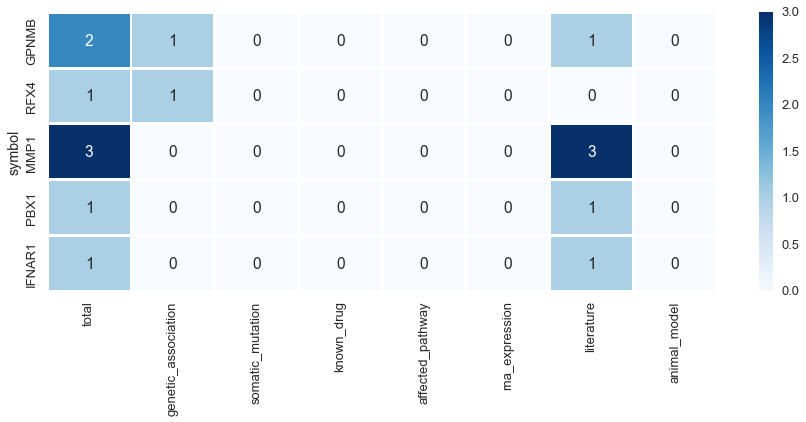

In [7]:
dfParkinsonRows = len(dfParkinson.index)
#print dfParkinsonRows
dfEvidenceTypes = dfParkinson.iloc[0:dfParkinsonRows, 0:8]
utilityOT.show_heatmap(dfEvidenceTypes, 15) #15 inches 
#This heatmap shows counts of evidence bbroken down by evidence type


# Further break down for genetic association evidence for Parkinsons

DONE


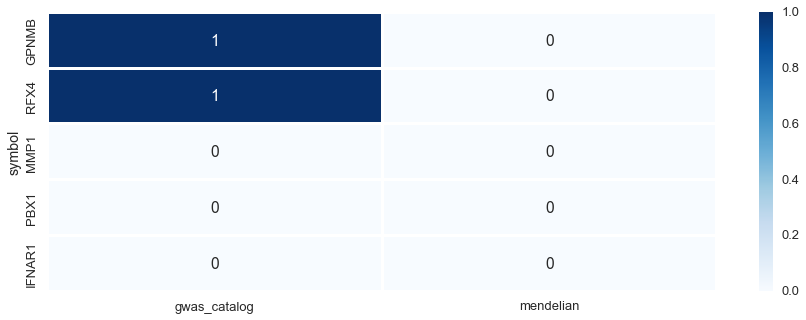

In [9]:
dfGeneticEvidence= dfParkinson.ix[0:dfParkinsonRows, ['gwas_catalog', 'mendelian']]
utilityOT.show_heatmap(dfGeneticEvidence, 15) #15 inches

# Evidence type counts for Nervous System Disease top 15 results

symbol,total,genetic_association,somatic_mutation,known_drug,affected_pathway,rna_expression,literature,animal_model,gwas_catalog,eva,eva_somatic,uniprot,uniprot_literature

        total  genetic_association  somatic_mutation  known_drug  \
symbol                                                             
BRAF      202                   37                16           2   
PALB2      10                    7                 0           0   
IFNAR1    106                    1                 0          63   
GPNMB      44                    1                 0           0   
MAP1B      38                    1                 0           0   
RFX4       18                    1                 0           0   
RGS17       6                    1                 0           0   
LRRC31      1                    1                 0           0   
MMP1      110                    0                 0           2   
CIC        44                    0                 5           0   
SLC6A8    

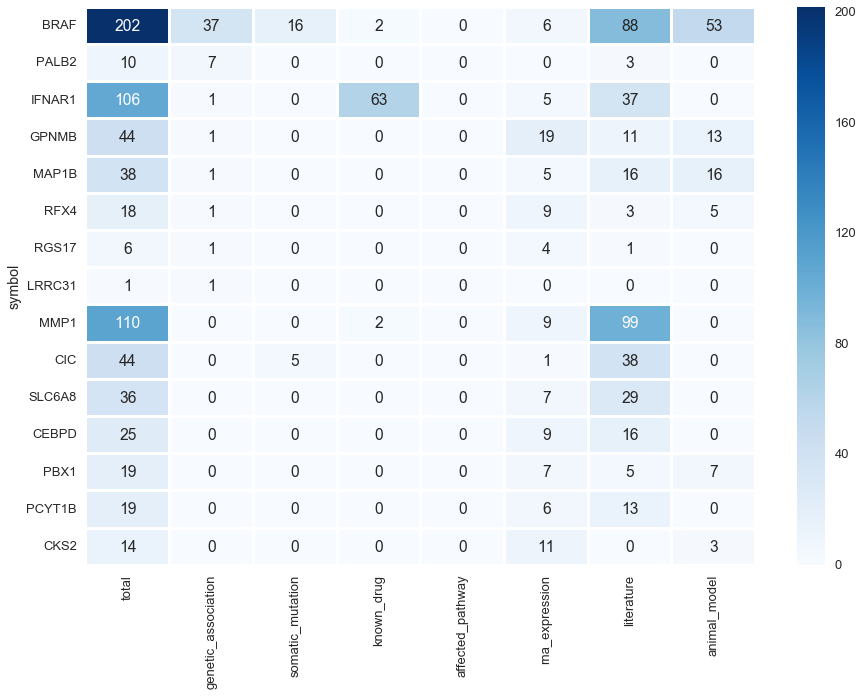

In [2]:
#Now lets do the same for the more generic 'nervous system disease'
myTargets = utilityOT.read_genes_from_file('examples/random_gene_ens_codes_100.txt')
#nsdCountsTextCSV = utilityOT.get_disease_and_target_evidence_count('nervous system disease', myTargets, 'examples/nsd_counts')
utilityOT.edit_header('examples/nsd_counts.csv', 'examples/nsd_counts_new_header.csv', 14)
dfNsd = pd.read_csv('examples/nsd_counts_new_header.csv',header=0,index_col=0)
dfNsd['mendelian'] = dfNsd.apply (lambda row: utilityOT.get_mendelian_count (row), axis=1)

dfNsdRows = len(dfNsd.index)
#print dfParkinsonRows
dfNsdSorted = dfNsd.sort(['genetic_association','total'], ascending=[0,0])

dfNsdEvidenceTypes = dfNsdSorted.iloc[0:15, 0:8]  #show 10 rows and 8 columns
#print dfNsdEvidenceTypes
utilityOT.show_heatmap(dfNsdEvidenceTypes, 15, 10) #15 inches 


# # Genetic Evidence break down for Nervous System Disease (top 15 results)

DONE


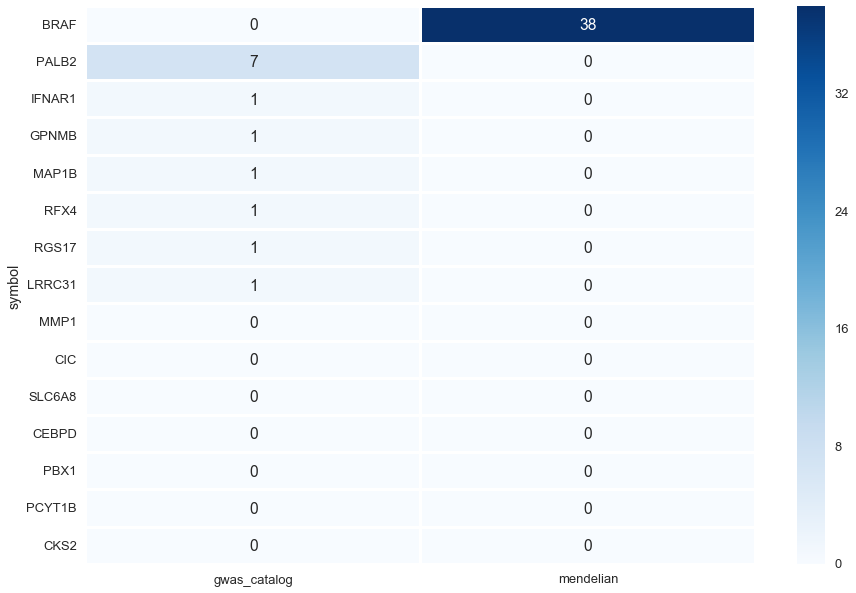

In [3]:
dfNsdGeneticEvidence= dfNsdSorted.ix[0:15, ['gwas_catalog', 'mendelian']]
utilityOT.show_heatmap(dfNsdGeneticEvidence, 15, 10) #15 inches